# Solution of 5.9.2, Map of Science 
### Read the file `pubmed-catdisease-set.txt`, and extract all the US ZIP codes.

First, import the modules we'll need.

In [6]:
import re
import csv
import pandas as pd
import matplotlib.pyplot as pltb
import itertools

Now read the whole file, and store it into a string.

In [7]:

with open('./pubmed-catdisease-set.txt',"r", encoding='utf-8-sig') as f:
    my_text = f.read()
    my_text = re.sub(r'\n\s{6}', ' ', my_text)

In [8]:
 text1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", my_text) 

Note that the zipcode could be broken over two lines, as in line 43 of `pubmed-catdisease-set.txt`

```
AD  - National Mycology Reference Centre, Microbiology and Infectious Diseases, SA 
      Pathology, Frome Road, Adelaide SA 5000, Australia.
```

To avoid problems, replace each newline followed by 6 spaces with a single space.

In [13]:
unique_text =list(set(text1))
unique_text.sort()
a = unique_text
print(a[:20])

[', AbbVie.', ', Accelerate.', ', Afd.', ', Alabama.', ', Albacete.', ', Albania.', ', Algeria.', ', Alicante.', ', Amgen.', ', Angola.', ', Argentina.', ', Arizona.', ', Armenia.', ', Australia.', ', Austria.', ', Avd.', ', Avda.', ', Ave.', ', BMS.', ', BRAZIL.']


We should now have every entry in a single line. Let's look at part of an entry:

In [15]:
b = unique_text
b.remove(', AbbVie.')
b.remove(', Accelerate.')
b.remove(', Afd.')
b.remove(', Albacete.')
b.remove(', Alabama.')
b.remove(', Alicante.')
b.remove(', Amgen.')
b.remove(', Arizona.')
b.remove(', Avda.')
b.remove(', Avd.')
b.remove(', Ave.')
b.remove(', BMS.')


Now write a regular expression that creates a list of zipcodes:

In [16]:
print() 
print(' países : ', b)


 países :  [', Albania.', ', Algeria.', ', Angola.', ', Argentina.', ', Armenia.', ', Australia.', ', Austria.', ', BRAZIL.', ', Badajoz.', ', Badalona.', ', Bahnhofstr.', ', Bahrain.', ', Bangladesh.', ', Barakaldo.', ', Barcelona.', ', Basel.', ', Beijing.', ', Belarus.', ', Belgium.', ', Berlin.', ', Bern.', ', Bizkaia.', ', Blvd.', ', Bolivia.', ', Bordeaux.', ', Brasil.', ', Brazil.', ', Bul.', ', Bulgaria.', ', Burgos.', ', CEVA.', ', CIBERDEM.', ', Cairo.', ', Calif.', ', California.', ', Cambodia.', ', Cameroon.', ', Canada.', ', Cantabria.', ', Carr.', ', Cartagena.', ', Cat.', ', CatLab.', ', Chile.', ', China.', ', Colombia.', ', Colorado.', ', Colorodo.', ', Columbia.', ', Congo.', ', Conj.', ', Coslada.', ', Croatia.', ', Crta.', ', Ctra.', ', Cuba.', ', Cyprus.', ', Czech.', ', Czechia.', ', Denmark.', ', Dept.', ', Deutschland.', ', Ecuador.', ', Edif.', ', Egypt.', ', England.', ', Essex.', ', Estonia.', ', Ethiopia.', ', Europe.', ', Exeltis.', ', Fac.', ', Ferrara.',

The anatomy of the regular expression:
```
[A-Z]{2}  -> two capital letters (for the state)
\s -> followed by a space
\d{5} -> followed by exactly 5 digits
, USA -> follwed by the string ", USA"
```
Note that we use a group `(\d{5})` to capture exclusively the zipcode proper.

In [18]:
c = "".join(b)
d = c.split(", ")
e = "".join(d)
f = e.split(".")
f.remove("")
g = f
print()
print(' lista : ', g)


 lista :  ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'BRAZIL', 'Badajoz', 'Badalona', 'Bahnhofstr', 'Bahrain', 'Bangladesh', 'Barakaldo', 'Barcelona', 'Basel', 'Beijing', 'Belarus', 'Belgium', 'Berlin', 'Bern', 'Bizkaia', 'Blvd', 'Bolivia', 'Bordeaux', 'Brasil', 'Brazil', 'Bul', 'Bulgaria', 'Burgos', 'CEVA', 'CIBERDEM', 'Cairo', 'Calif', 'California', 'Cambodia', 'Cameroon', 'Canada', 'Cantabria', 'Carr', 'Cartagena', 'Cat', 'CatLab', 'Chile', 'China', 'Colombia', 'Colorado', 'Colorodo', 'Columbia', 'Congo', 'Conj', 'Coslada', 'Croatia', 'Crta', 'Ctra', 'Cuba', 'Cyprus', 'Czech', 'Czechia', 'Denmark', 'Dept', 'Deutschland', 'Ecuador', 'Edif', 'Egypt', 'England', 'Essex', 'Estonia', 'Ethiopia', 'Europe', 'Exeltis', 'Fac', 'Ferrara', 'Finland', 'Fipec', 'Fla', 'Florida', 'Fond', 'Foundation', 'France', 'Georgia', 'Germany', 'Getafe', 'Geuensee', 'Ghana', 'Girona', 'Gorai', 'Granada', 'Graz', 'Greece', 'Grenada', 'Guadalajara', 'Guilan', 'HMB', 'Hamb

In [19]:
data = pd.read_csv('./Paises_ubicacion.csv', engine='python', skipfooter=3)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,AN,12.226079,-69.060087,Netherlands Antilles
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


Extract the unique zipcodes 

In [20]:
name = data[data.name.isin(g)]
name.head(10)

,country,latitude,longitude,name
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
8,AO,-11.202692,17.873887,Angola
10,AR,-38.416097,-63.616672,Argentina
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
18,BD,23.684994,90.356331,Bangladesh
19,BE,50.503887,4.469936,Belgium
21,BG,42.733883,25.485830,Bulgaria
22,BH,25.930414,50.637772,Bahrain


In [21]:
paises = data[data.country.isin(g)]
all_data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
5,AL,41.153332,20.168331,Albania
58,DZ,28.033886,1.659626,Algeria
8,AO,-11.202692,17.873887,Angola
10,AR,-38.416097,-63.616672,Argentina
6,AM,40.069099,45.038189,Armenia
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
22,BH,25.930414,50.637772,Bahrain
18,BD,23.684994,90.356331,Bangladesh
33,BY,53.709807,27.953389,Belarus


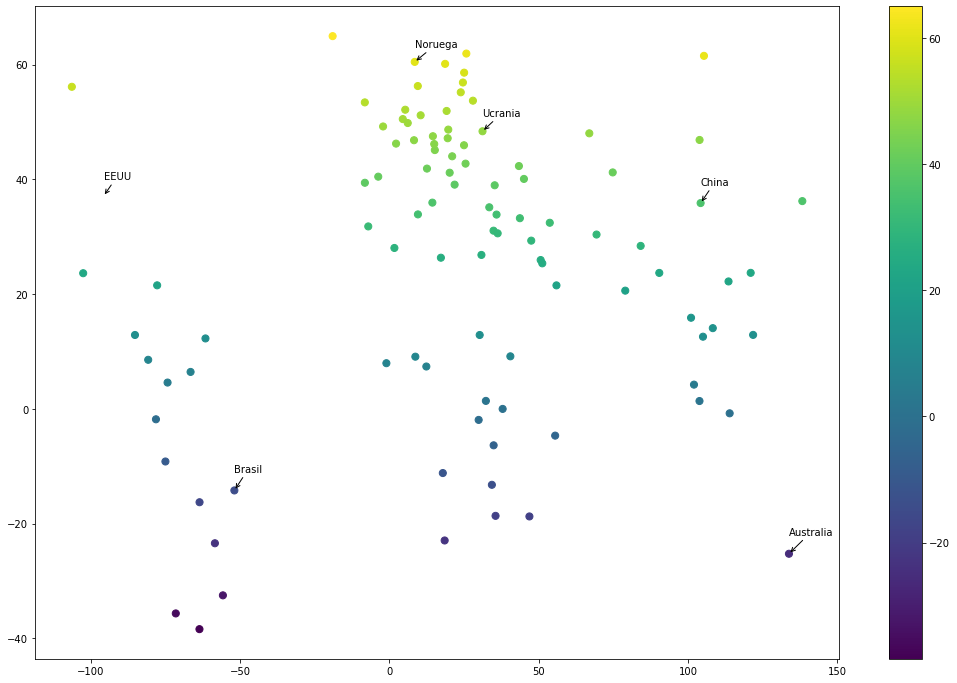

In [23]:
paises = data[data.country.isin(g)]
all_data =pd.concat([name,paises]).drop_duplicates().sort_values('name')
all_data.head(10)
import matplotlib.pyplot as plt
pltb.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)
pltb.colorbar()
ard = dict(arrowstyle="->")

pltb.annotate('Ucrania', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)

pltb.annotate('EEUU', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)

pltb.annotate('Brasil', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
pltb.annotate('Australia', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)

pltb.annotate('Noruega', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

pltb.annotate('China', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)

params = pltb.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

pltb.savefig("Map of Science.png")